<a href="https://colab.research.google.com/github/federicotarozzi/Corso_AnalistaProgrammatoreDatiGeoSpaziali/blob/main/7_correlation_yield_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation between yield and NDVI notebook

#### Import the library we need

In [ ]:
import pandas as pd
from scipy.integrate import simpson
from numpy import trapz
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset upload

In [ ]:
df = pd.read_csv('Data/yield_climate_data.csv')
ndvi = pd.read_csv('Data/NDVI_total_data.csv')

In [ ]:
# have a look on build NDVI dataframe
ndvi.head(5)

,index,Polygon_ID,Date,Mean_NDVI_per_pixel,Median_NDVI_per_pixel,Year,Province,ID,NDVI_ipotizzato,Median_ipotizzata,Days
0,13,10,05-04-2019,NaN,NaN,2019,Piacenza,10_2019_Piacenza,0.187929,0.159475,-25
1,14,10,05-07-2019,NaN,NaN,2019,Piacenza,10_2019_Piacenza,0.194003,0.164237,-24
2,15,10,05-09-2019,0.200077,0.1690,2019,Piacenza,10_2019_Piacenza,0.200077,0.169000,-23
3,16,10,05-12-2019,NaN,NaN,2019,Piacenza,10_2019_Piacenza,0.185246,0.159850,-22
4,17,10,05-14-2019,0.170415,0.1507,2019,Piacenza,10_2019_Piacenza,0.170415,0.150700,-21


_______________________________________________________________________________________________________________________________________

#### Curve parameters calculation
Choosen parameteres:
- NDVI area
- Average NDVI
- Maximum NDVI
- NDVI standard deviation

In [ ]:
new = []

for province_id in ndvi['Province'].unique():
    province = ndvi[ndvi['Province'] == province_id].copy()
    province['Date'] = pd.to_datetime(province['Date'])

    new_df = pd.DataFrame(columns=['Province',
                                     'Year',
                                     'NDVI area',
                                     'NDVI avg',
                                     'NDVI max',
                                     'NDVI std'])

    for year_id in province['Year'].unique():
        year = province[province['Year'] == year_id].copy()

        #CURVA MEDIA
        mean_curve = year.groupby('Days')['Median_ipotizzata'].mean().reset_index()

        # Assicurati che i valori nulli siano rappresentati come NaN, e filtra i valori nulli
        mean_curve["Median_ipotizzata"] = pd.to_numeric(mean_curve["Median_ipotizzata"], errors="coerce")
        mean_curve_clean = mean_curve.dropna(subset=["Median_ipotizzata"])

        #fare la curva media
        curva = mean_curve_clean.loc[mean_curve_clean['Days']>= -40]
        curva = curva.loc[curva['Days']<= 90].reset_index(drop=True)

        #AREA DELLA CURVA
        y = curva['Median_ipotizzata']
        area = trapz(y, dx=1)

        #MEDIA, MASSIMO, DEVIAZIONE STANDARD DELLA CURVA
        mean = curva['Median_ipotizzata'].mean()
        NDVI_max = curva['Median_ipotizzata'].max()
        std = curva['Median_ipotizzata'].std() # how much the values in the series deviate from the mean

        year['Date'] = pd.to_datetime(year['Date'])

        # Aggiungiamo i risultati al nuovo dataframe
        new_df = new_df.append({'Province': year['Province'].iloc[0],
                                    'Year': year['Date'].iloc[0].year ,
                                    'NDVI area': area,
                                    'NDVI avg' : mean,
                                    'NDVI max': NDVI_max,
                                    'NDVI std' : std
                                   }, ignore_index=True)

    new.append(new_df)

df_area = pd.concat(new)

df_area

,Province,Year,NDVI area,NDVI avg,NDVI max,NDVI std
0,Piacenza,2019,24.752812,0.383169,0.704198,0.219360
1,Piacenza,2020,27.514252,0.425554,0.776589,0.255151
2,Piacenza,2022,22.781416,0.352775,0.760010,0.252145
3,Piacenza,2023,23.460710,0.363413,0.765118,0.243928
4,Piacenza,2021,24.227696,0.375314,0.755438,0.235297
0,Ravenna,2020,19.192685,0.297135,0.691585,0.176160
1,Ravenna,2021,24.406504,0.376990,0.753080,0.272044
2,Ravenna,2022,21.583293,0.333667,0.697341,0.236296
3,Ravenna,2023,22.115305,0.342399,0.713110,0.239659


In [ ]:
#selection of the years that are the same as NDVI data extractions
df_fil = df[df['Year'].isin([2023, 2022, 2021, 2020, 2019])]
df_fil = df_fil[df_fil['Province'].isin(['Piacenza', 'Ravenna'])]
df_fil

,Province,Year,tot_area_ha,tot_prod_q,Yield,Class,Prec_cumulate_Q3,d_prec_Q3,prec_intensity_Q3,Prec_cumulate_Q2,...,su_Q3,d_tmax>30_Q3,d_tmax>35_Q3,d_tmax>40_Q3,d_tmix<10_Q3,d_tmix<19_Q3,wave>2d_30,wave>3d_25,wave>4d_20,GGD
331,Piacenza,2019,10418,6845160,657.051257,3,185.9,37,5.024324,287.7,...,78,52,6.0,0.0,1.0,51,11,6,4,1927.7
332,Piacenza,2020,10183,7528954,739.365020,3,212.7,36,5.908333,244.5,...,79,54,7.0,0.0,2.0,47,9,13,5,2169.7
333,Piacenza,2021,10631,8085600,760.568150,3,100.2,33,3.036364,180.8,...,85,39,2.0,0.0,1.0,57,8,9,5,2006.0
334,Piacenza,2022,9633,8001330,830.616630,4,155.8,36,4.327778,107.0,...,77,53,9.0,0.0,3.0,39,7,5,4,2142.5
365,Ravenna,2019,2245,1459250,650.000000,3,158.4,34,4.658824,244.3,...,81,48,1.0,0.0,1.0,45,8,5,5,1983.2
366,Ravenna,2020,1890,1436400,760.000000,3,128.2,38,3.373684,83.1,...,85,48,2.0,0.0,1.0,48,8,7,4,2050.6
367,Ravenna,2021,2200,1804000,820.000000,4,99.9,35,2.854286,87.0,...,85,49,3.0,0.0,0.0,44,5,5,4,2021.8
368,Ravenna,2022,2222,1744270,785.000000,3,169.7,46,3.689130,103.1,...,78,59,4.0,0.0,4.0,36,10,4,5,2176.6


### Calculation of correlations

In [ ]:
#built the right dataset
correlation = df_area.merge(df_fil, on=['Province', 'Year'], how='inner')

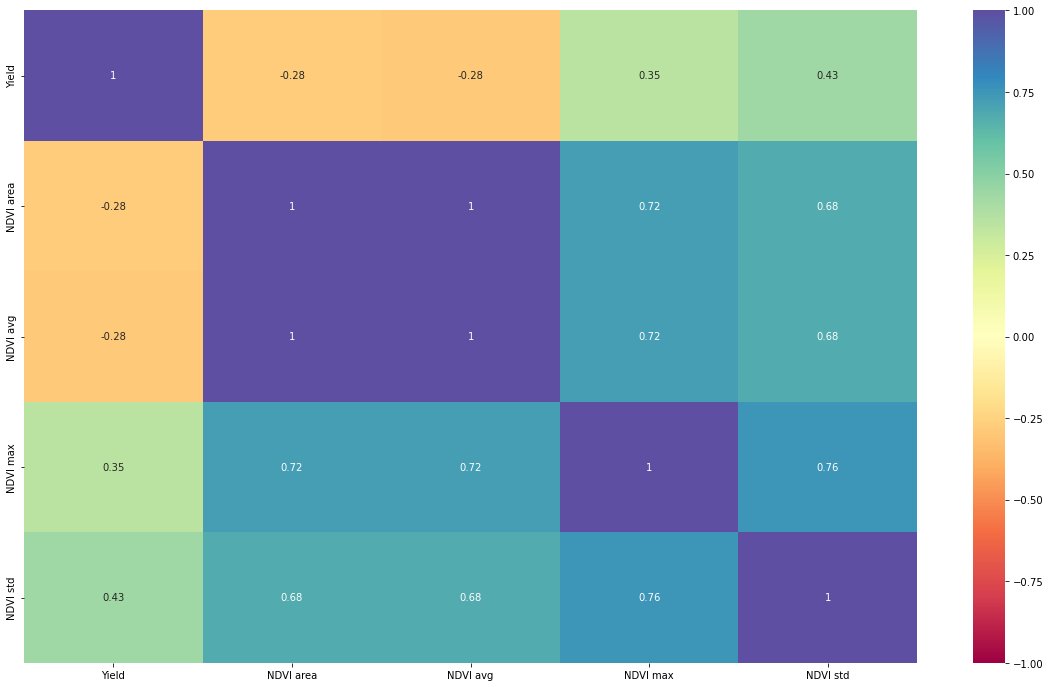

In [ ]:
#heatmap setting
fig, p = plt.subplots(figsize=(20, 12))
f_corr = correlation[['Yield', 'NDVI area', 'NDVI avg', 'NDVI max', 'NDVI std']].dropna().corr(method='pearson')
p = sns.heatmap(f_corr, annot = True, vmin= -1 , vmax= 1, cmap="Spectral")

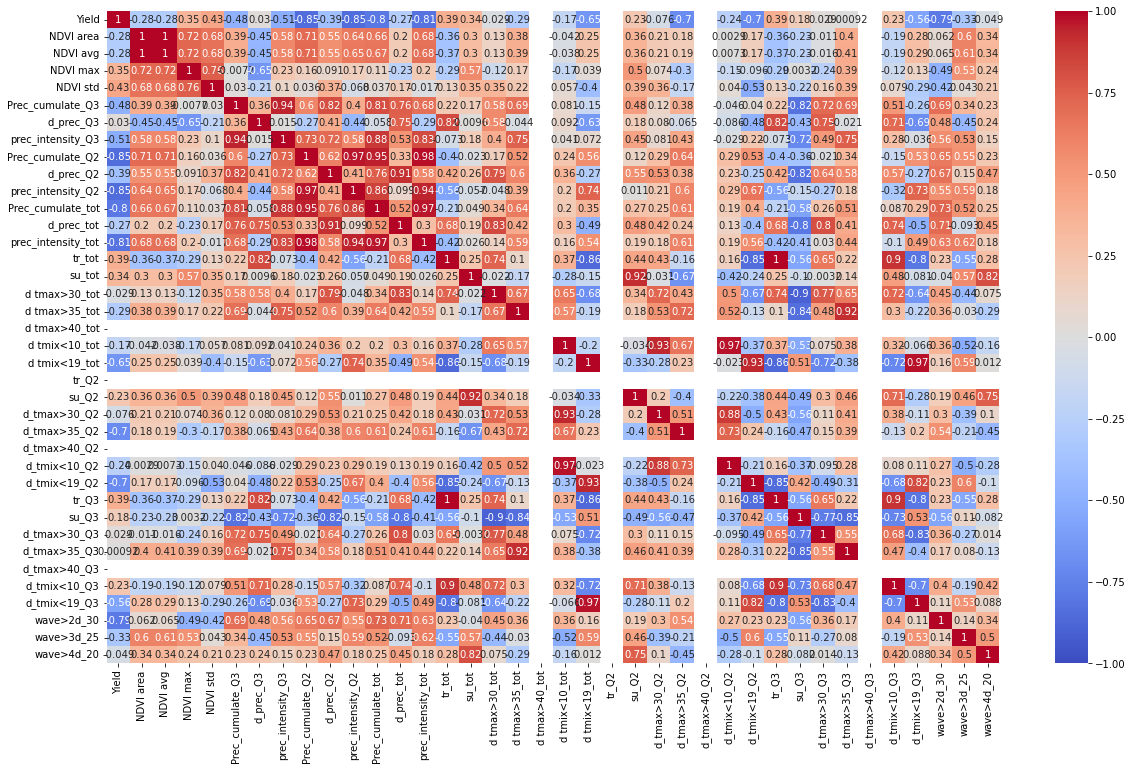

In [ ]:
fig, p = plt.subplots(figsize=(20, 12))

df_corr = correlation[['Yield', 'NDVI area', 'NDVI avg', 'NDVI max', 'NDVI std', 'Prec_cumulate_Q3',
       'd_prec_Q3', 'prec_intensity_Q3', 'Prec_cumulate_Q2', 'd_prec_Q2',
       'prec_intensity_Q2', 'Prec_cumulate_tot', 'd_prec_tot',
       'prec_intensity_tot', 'tr_tot', 'su_tot', 'd tmax>30_tot',
       'd tmax>35_tot', 'd tmax>40_tot', 'd tmix<10_tot', 'd tmix<19_tot',
       'tr_Q2', 'su_Q2', 'd_tmax>30_Q2', 'd_tmax>35_Q2', 'd_tmax>40_Q2',
       'd_tmix<10_Q2', 'd_tmix<19_Q2', 'tr_Q3', 'su_Q3', 'd_tmax>30_Q3',
       'd_tmax>35_Q3', 'd_tmax>40_Q3', 'd_tmix<10_Q3', 'd_tmix<19_Q3',
       'wave>2d_30', 'wave>3d_25', 'wave>4d_20']
            ].dropna().corr(method='pearson')
p = sns.heatmap(df_corr, annot = True, vmin= -1 , vmax= 1, cmap="coolwarm")
